<a href="https://colab.research.google.com/github/s10nenok/AES/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
60000
tensor([8, 7, 7,  ..., 7, 4, 7])
60000


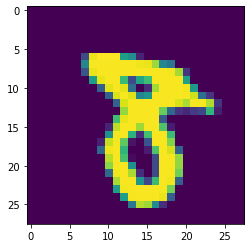

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
60000
tensor([8, 7, 7,  ..., 7, 4, 7])
60000


ValueError: ignored

In [17]:
import gzip
import torch
import torchvision
import numpy as np
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import random 

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))




def read_train():
    reorder_type = np.dtype(np.int32).newbyteorder('>')
    way = 'MNIST/raw/'
    tr_im_way = way+'train-images-idx3-ubyte.gz'
    tr_im = gzip.open(tr_im_way,'r')
            
    image_magic_number = np.frombuffer(tr_im.read(4), dtype=reorder_type)[0]
    num_images = np.frombuffer(tr_im.read(4), dtype=reorder_type)[0]
    image_rows = np.frombuffer(tr_im.read(4), dtype=reorder_type)[0]
    image_columns = np.frombuffer(tr_im.read(4), dtype=reorder_type)[0]

    buffer = tr_im.read(num_images * image_rows * image_columns)

    images = np.frombuffer(buffer, dtype = np.uint8).astype(np.float32)
    images = np.reshape(images, (num_images, 784))
    images = images/255

    images = torch.tensor(images)

    
    tr_im.close()

    
    
    tr_lb_way = way+'train-labels-idx1-ubyte.gz'
    tr_lb = gzip.open(tr_lb_way,'r')

    label_magic_number = np.frombuffer(tr_lb.read(4), dtype=reorder_type).astype(np.int64)[0]
    num_labels = np.frombuffer(tr_lb.read(4), dtype=reorder_type).astype(np.int64)[0]
    buffer = tr_lb.read(num_labels)
    labels = np.frombuffer(buffer, dtype = np.uint8)
    labels = torch.tensor(labels, dtype = torch.long)

    tr_lb.close()

    permutation = np.random.permutation(len(labels)) 
    images = images[permutation] 
    labels = labels[permutation]

    print(images)
    print(len(images))

    print(labels)
    print(len(labels))

    plt.imshow(images[0].view(28,28))
    plt.show()

    images = np.roll(images, random.randint(0,len(images)))

    print(images)
    print(len(images))

    print(labels)
    print(len(labels))

    plt.imshow(images[0].view(28,28))
    plt.show()


def rotate(images):
    for i in range(len(images)):
      angle = random.randint(-90,90)
      images[i] = np.rot90(images[i], int(angle/90))


def read_test():
    way = 'MNIST/raw/'
    test_im_way = way+'t10k-images-idx3-ubyte.gz'
    test_im = gzip.open(test_im_way,'rb')
    test_im.read(16)
   
    test_lb_way = way+'t10k-labels-idx1-ubyte.gz'
    test_lb = gzip.open(test_lb_way,'rb')
    test_lb.read(8)

    labels_test = np.fromfile(test_lb, dtype=np.uint8)
    images_test = np.fromfile(test_im, dtype=np.uint8).reshape(len(labels_test), 784) / 255

    test_im.close()
    test_lb.close()
    return images_test, labels_test



#################
read_train()
##read_test()


